## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

## Read data

In [2]:
df = pd.read_csv("./Uber-dataset/uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df.shape

(564516, 4)

## Extract all the unique bases 

In [4]:
k=df["Base"]
k=list(set(k))
print(k)

['B02598', 'B02512', 'B02617', 'B02682', 'B02764']


## Encode all the bases to numbers 

In [5]:
l=dict()
for i in range(len(k)):
    l[k[i]]=i
print(l)

{'B02598': 0, 'B02512': 1, 'B02617': 2, 'B02682': 3, 'B02764': 4}


In [6]:
df['Base_num'] = [l[i] for i in df.Base]
df.head()

,Date/Time,Lat,Lon,Base,Base_num
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1


## Plot base with lon and lat

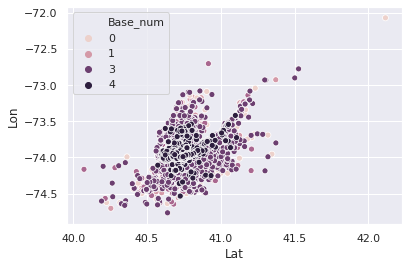

In [7]:
sns.scatterplot(
    x='Lat',
    y='Lon',
    hue='Base_num',
    data=df
)

### Let's Predict base number given latitude and longitude using k nearest neighbours algorithm 

### First let's drop all the coloums which are not useful and create attributes column and classes coloumn

In [8]:
X = df.drop(['Base', 'Base_num', 'Date/Time'], axis=1)
y = df.Base_num

### Next let's split the column into test and train 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Train KNN algorithm

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predict with help of trained model

In [11]:
y_pred = knn.predict(X_test)

### Create a confusion Matrix

In [12]:
confusion_matrix(y_test, y_pred)

array([[20463,  1175,  6372, 17990,    34],
       [ 3906,   376,  1238,  3286,     8],
       [11908,   747,  4340,  9792,    18],
       [24998,  1365,  7696, 22879,    43],
       [ 1065,    65,   401,   959,     5]])